**Лабораторная работа №5** Вариант 9

**Цель лабораторной работы:** научиться производить кластерный анализ данных с
использованием метода К-средних.

Датасет – Fashion_Retail_Sales.csv

Набор данных представляет операции продажи одежды в магазине. Он дает ин
формацию о покупательском поведении, о товарах, которые покупают, о способах
оплаты и уровне удовлетворенности покупателей товарами.  
Атрибуты:
* **Customer Reference ID** – идентификатор покупателя
* **Item Purchased** – приобретенный товар
* **Purchase Amount (USD)** – сумма покупки (в долларах США)
* **Date Purchase** – дата покупки
* **Review Rating** – оценка по отзывам (уровень удовлетворенности клиентов от 1
до 5)
* **Payment Method** – способ оплаты

**1. Импортируем библиотеки и загружаем данные.**

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv('/content/Fashion_Retail_Sales.csv')
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


**2. Получим информацию о датасете.**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


**3. Проверяем наличие пропущенных значений и выбросов.**

In [114]:
print(df.isnull().sum())
# Обработка пропущенных значений для числовых признаков перед масштабированием
df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


/tmp/ipython-input-2488475111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)
/tmp/ipython-input-2488475111.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

**4. Применяем операцию нормализации для численной устойчивости.**

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

**5. Приведем данные к единому масштабу.**

In [116]:

# Выбираем соответствующие числовые столбцы для масштабирования из набора данных Fashion_Retail_Sales
numerical_features = ['Purchase Amount (USD)', 'Review Rating']

X = scaler.fit_transform(df[numerical_features])
X[:5]

array([[11.82878047,  0.        ],
       [ 6.09503141, -0.90836331],
       [ 5.15663697,  1.00099976],
       [ 7.87108868,  0.1827013 ],
       [ 7.54503637,  1.54653206]])

**6. Определяем оптимальное количество кластеров с помощью метода локтя**

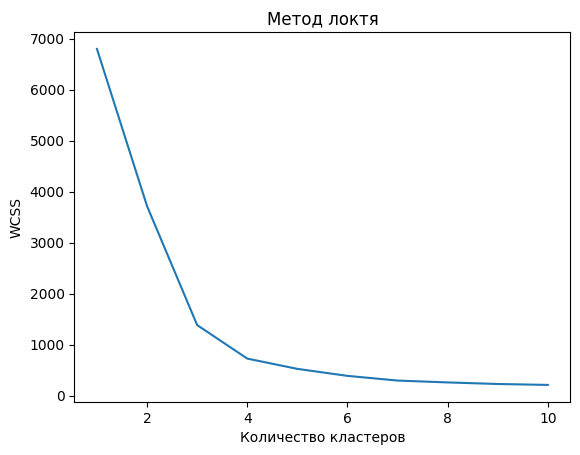

In [117]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

**7. Обучаем модель кластеризации.**

In [118]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

**8. Предсказываем кластеры и визуализируем результаты.**

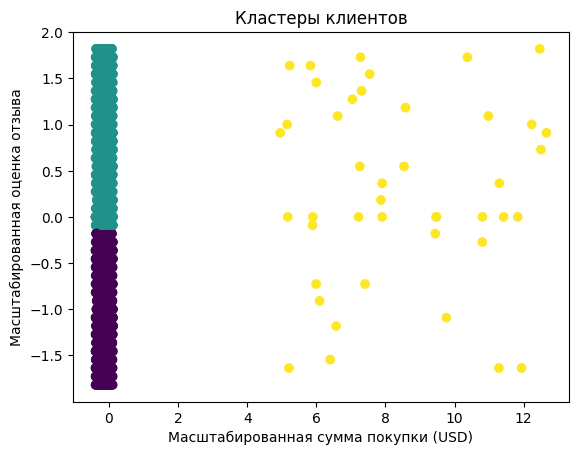

In [119]:
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Кластеры клиентов')
plt.xlabel('Масштабированная сумма покупки (USD)')
plt.ylabel('Масштабированная оценка отзыва')
plt.show()

**9. Интерпретируем результаты и улучшаем модель при необходимости.**

In [120]:
X[:5]

array([[11.82878047,  0.        ],
       [ 6.09503141, -0.90836331],
       [ 5.15663697,  1.00099976],
       [ 7.87108868,  0.1827013 ],
       [ 7.54503637,  1.54653206]])

In [121]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [122]:
df['Label'] = labels
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Label
0,4018,Handbag,4619.0,05-02-2023,2.999057,Credit Card,2
1,4115,Tunic,2456.0,11-07-2023,2.000000,Credit Card,2
2,4019,Tank Top,2102.0,23-03-2023,4.100000,Cash,2
3,4097,Leggings,3126.0,15-03-2023,3.200000,Cash,2
4,3997,Wallet,3003.0,27-11-2022,4.700000,Cash,2


In [123]:
numeric_columns = ['Purchase Amount (USD)', 'Review Rating']
cluster_groups = df[numeric_columns + ['Label']].groupby('Label')
cluster_groups.mean()

,Purchase Amount (USD),Review Rating
Label,,
0,113.834383,1.916051
1,117.692442,3.774399
2,3329.116279,3.318407


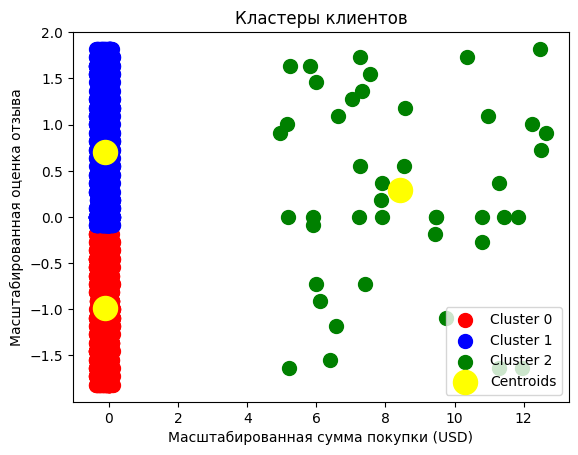

In [124]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Масштабированная сумма покупки (USD)')
plt.ylabel('Масштабированная оценка отзыва')
plt.legend()
plt.show()

**10. Снижение размерности набора данных с помощью метода PCA.**

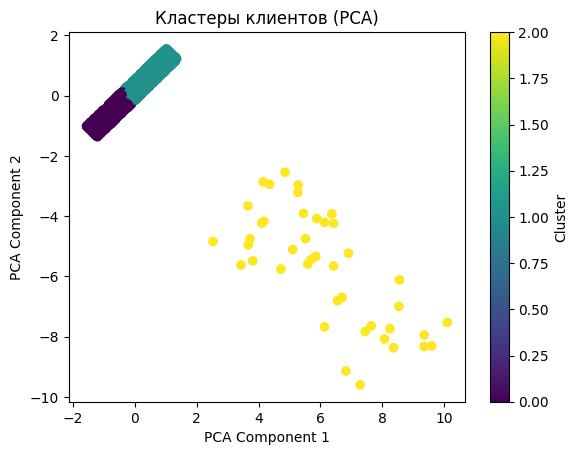

In [131]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Кластеры клиентов (PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [126]:
numeric_columns = ['Purchase Amount (USD)', 'Review Rating']
cluster_groups = df[numeric_columns + ['Label']].groupby('Label')
cluster_groups.mean()

,Purchase Amount (USD),Review Rating
Label,,
0,113.834383,1.916051
1,117.692442,3.774399
2,3329.116279,3.318407


In [127]:
df.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Label
0,4018,Handbag,4619.000000,05-02-2023,2.999057,Credit Card,2
1,4115,Tunic,2456.000000,11-07-2023,2.000000,Credit Card,2
2,4019,Tank Top,2102.000000,23-03-2023,4.100000,Cash,2
3,4097,Leggings,3126.000000,15-03-2023,3.200000,Cash,2
4,3997,Wallet,3003.000000,27-11-2022,4.700000,Cash,2
5,4080,Onesie,2914.000000,11-12-2022,4.500000,Credit Card,2
6,4055,Jacket,2571.000000,08-07-2023,1.300000,Cash,2
7,3973,Trousers,2419.000000,10-11-2022,4.600000,Cash,2
8,4044,Jeans,4771.000000,19-05-2023,4.100000,Cash,2
9,4010,Loafers,4233.000000,11-06-2023,2.999057,Credit Card,2


In [128]:
# Вывод товаров в каждом кластере
for cluster_num in range(3):
  print(f"\nCluster {cluster_num} items")
  print(df[df['Label'] == cluster_num]['Item Purchased'].values)


Cluster 0 items
['Backpack' 'Trousers' 'Backpack' ... 'Onesie' 'Sandals' 'Backpack']

Cluster 1 items
['Dress' 'Boots' 'Camisole' ... 'Flip-Flops' 'Sweater' 'Polo Shirt']

Cluster 2 items
['Handbag' 'Tunic' 'Tank Top' 'Leggings' 'Wallet' 'Onesie' 'Jacket'
 'Trousers' 'Jeans' 'Loafers' 'Slippers' 'Bowtie' 'Pajamas' 'Trench Coat'
 'Handbag' 'Poncho' 'Gloves' 'Trench Coat' 'Slippers' 'Romper' 'T-shirt'
 'Gloves' 'Jeans' 'Flip-Flops' 'Tunic' 'Shorts' 'Blazer' 'Boots' 'Poncho'
 'Belt' 'Tunic' 'Boots' 'Flip-Flops' 'Hoodie' 'Sweater' 'Blouse'
 'Swimsuit' 'Kimono' 'Cardigan' 'Socks' 'Pants' 'Pajamas' 'Scarf']


**Кластер 0:** Эти клиенты характеризуются низкой средней суммой покупки (около 114 USD) и низким средним рейтингом отзывов (примерно 1.9). Наиболее часто покупаемые товары в этом кластере включают Camisole, Shorts, Pajamas, Flannel Shirt и Sunglasses. Это может указывать на клиентов, которые совершают небольшие покупки и, возможно, не полностью удовлетворены ими, или же это клиенты, ориентированные на бюджетные товары.

**Кластер 1:** Клиенты в этом кластере также имеют низкую среднюю сумму покупки (около 118 USD), но при этом демонстрируют относительно высокий средний рейтинг отзывов (примерно 3.8). Топ-5 товаров для этого кластера: Skirt, Belt, Pants, Tank Top и Scarf. Этот сегмент, вероятно, включает лояльных, но экономных покупателей, которые, несмотря на небольшие траты, довольны своими приобретениями.

**Кластер 2:** Этот кластер выделяется очень высокой средней суммой покупки (около 3329 USD) и средним рейтингом отзывов (примерно 3.3). Среди часто покупаемых товаров здесь выделяются Tunic, Handbag, Gloves, Poncho и Pajamas. Это, скорее всего, клиенты с крупными покупками, которые тратят значительно больше других, но их уровень удовлетворенности не достигает максимума, что предоставляет возможности для улучшения сервиса и повышения лояльности.